In [57]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import os
import re

VID_ROOT = '/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/harden/'
DATA_ROOT = '/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/'

In [58]:
img = plt.imread(VID_ROOT+'/view_0/frame_00089.png')
img = (img*255/img.max()).astype(np.uint8)

# court = plt.imread('/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/models/court.png')
# court_bin = court.mean(axis=-1)<.5

court = plt.imread(DATA_ROOT+'/models/court.png')
court_bin = court.mean(axis=-1)>.9
court = (court*255/court.max()).astype(np.uint8)

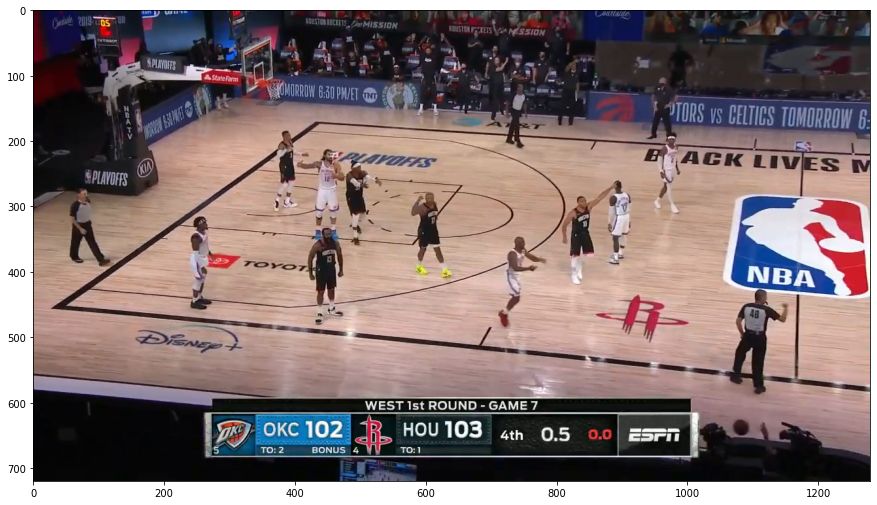

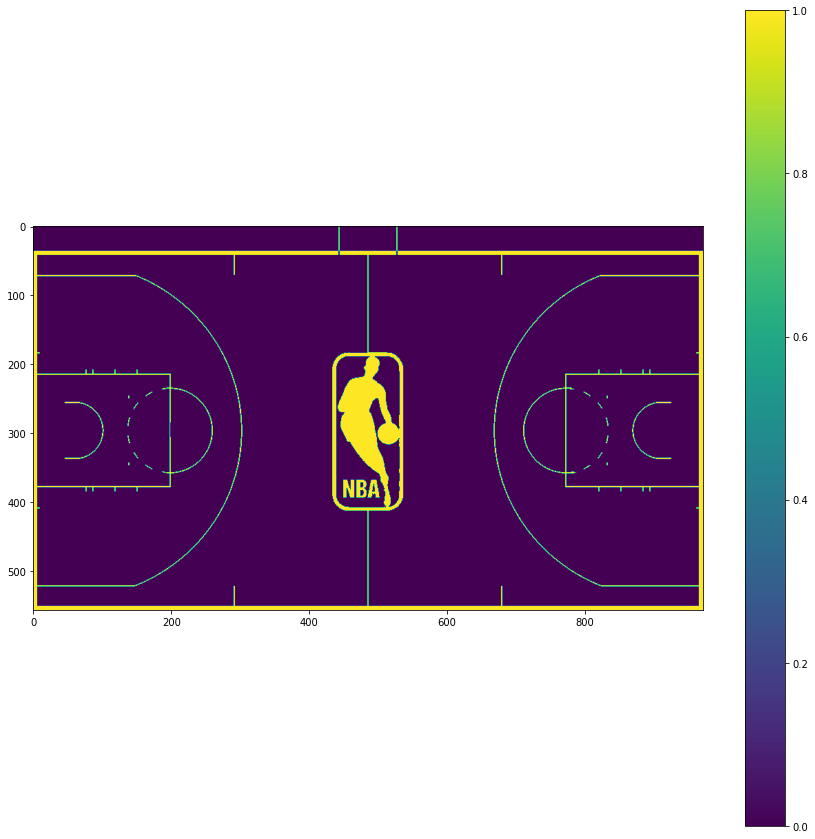

In [59]:
plt.figure(figsize=(15,15))
plt.imshow(img);plt.show()
plt.figure(figsize=(15,15))
plt.imshow(court_bin);plt.colorbar();plt.show()

In [61]:
# coordinates on the outside of corners,
# order: top left, bot left, bot right, top right
# (x, y) not (y, x)
court_corners = np.array([[0,  36],[0, 557],[972, 557],[972, 36]])
left_halfcourt_corners = np.array([[0,  36],[0, 557],[486, 557],[486, 36]])
right_halfcourt_corners = np.array([[485,  36],[485, 557],[972, 557],[972, 36]])

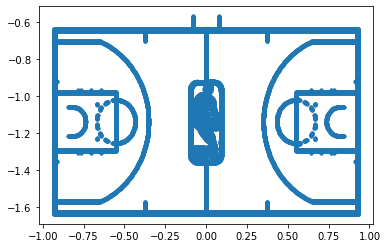

In [62]:
M = np.eye(3)
scale = 1/(court_corners[1, 1] -court_corners[0, 1])
M[1, 1] *= -1
M[:2, :2] = scale*M[:2, :2]
M[:2, 2] = -scale*court_corners.mean(axis=0)
np.save(DATA_ROOT+'/models/mat_model', M)

y, x = np.where(court_bin)
X = np.stack([x, y, np.ones_like(x)], axis=-1)
X = M@X[..., :, None]
X = X[:, :2]
plt.scatter(X[:, 0], X[:,1], marker='.')


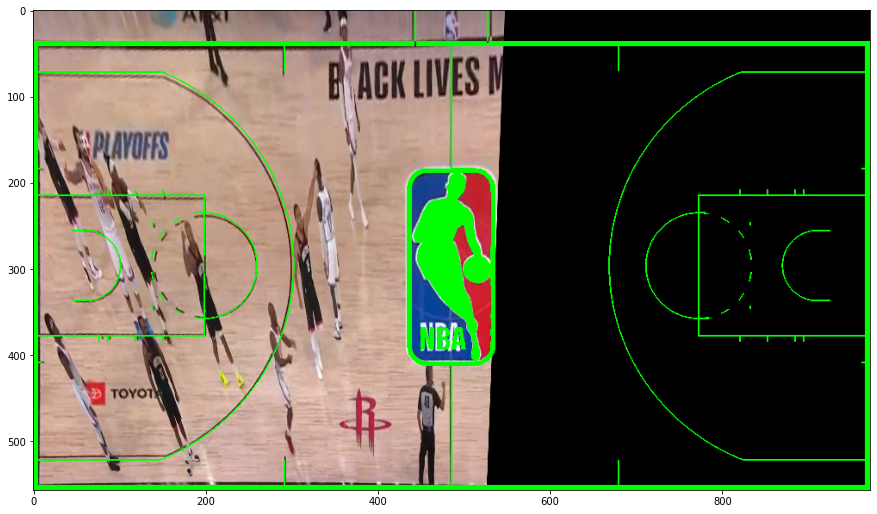

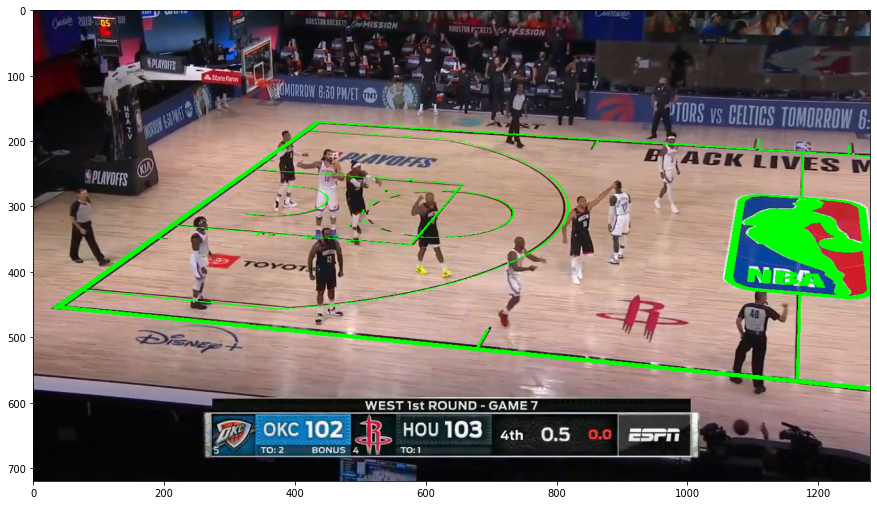

In [77]:
src = np.array([[433, 170], [28, 456], [1170,571], [1178, 216]])
dst = left_halfcourt_corners
M, _ = cv2.findHomography(src, dst, )

plt.figure(figsize=(15,15))
imgt = cv2.warpPerspective(img, M, dsize=court.shape[:2][::-1])
imgt[court_bin, :] = 0.
imgt[court_bin, 1] = 255.
imgt = np.clip(imgt, 0, 255)

plt.imsave('/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/models/view_0_frame_00089_transformed.png', 
           imgt)
plt.imshow(imgt)

plt.figure(figsize=(15,15))
courtt = cv2.warpPerspective(court, M, dsize=img.shape[:2][::-1], flags=cv2.WARP_INVERSE_MAP)
courtt = courtt[..., :3].mean(axis=-1)>180
imgt = img.copy()
imgt[courtt, :] = 0.
imgt[courtt, 1] = 255.
imgt = np.clip(imgt, 0, 255)

plt.imshow(imgt)

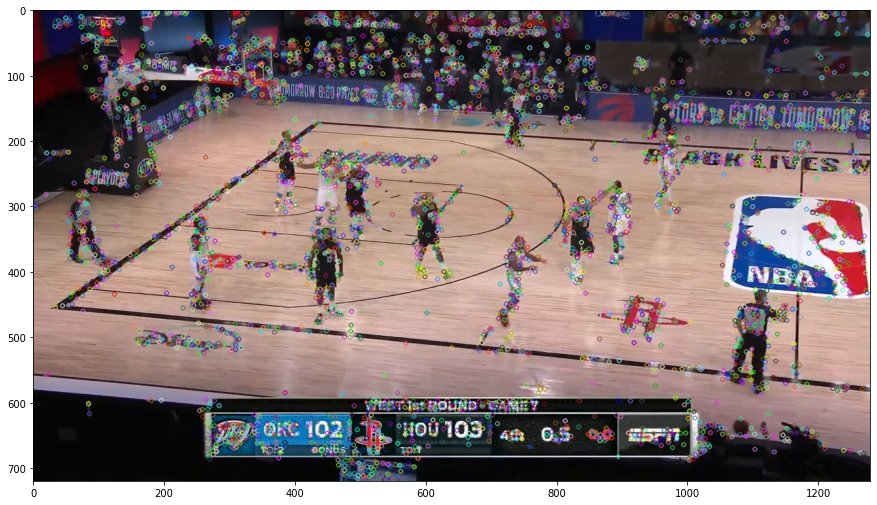

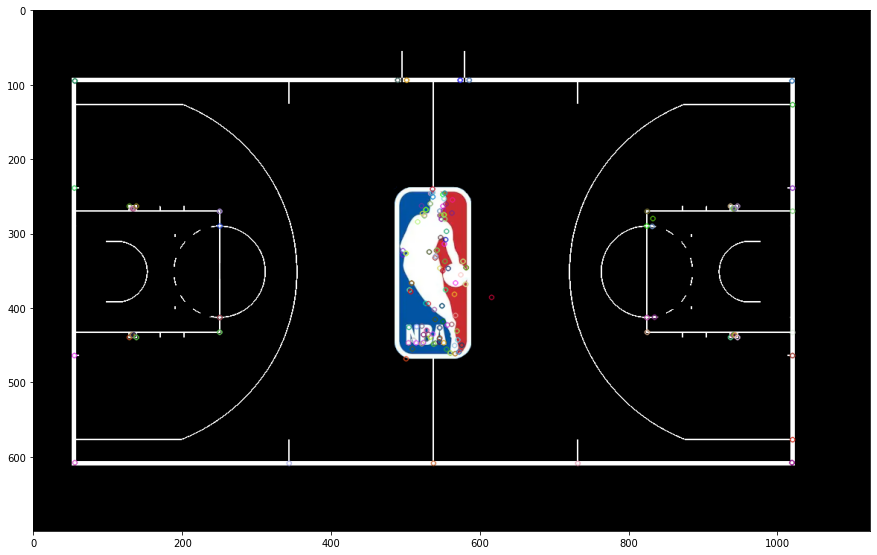

In [11]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img, None)
kp2, des2 = sift.detectAndCompute(court, None)


# orb = cv2.ORB_create()
# kp1 = orb.detect(img,None)
# kp2 = orb.detect(court,None)

# star = cv2.FeatureDetector_create("STAR")
# brief = cv2.DescriptorExtractor_create("BRIEF")
# kp1 = star.detect(img,None)
# kp2 = star.detect(court,None)

# surf = cv2.xfeatures2d.SURF_create()
# kp1, des1 = surf.detectAndCompute(img, None)
# kp2, des2 = surf.detectAndCompute(court, None)

# fast = cv2.FastFeatureDetector_create()
# kp1 = fast.detect(img,None)
# kp2 = fast.detect(court,None)


draw = img.copy()
draw = cv2.drawKeypoints(img, kp1, draw)
plt.figure(figsize=(15,15))
plt.imshow(draw)

draw = court.copy()
draw = cv2.drawKeypoints(court, kp2, draw)
plt.figure(figsize=(15,15))
plt.imshow(draw)

In [10]:
print(len(kp1))
print(len(kp2))

11504
269
